**Neural network**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import time

para_meter = torch.load('pytorch_model.pth') #Loading parameter

#Figuring 'para_meter' size concering 'W' and 'b', NN layer understanding and each NN layer size.
print("Model paramenter details")
for key, i in para_meter.items():
    if 'weight' in key:
        print(f"{key}: {i.size()}")
    if i.requires_grad:
        print(f"{key} is trainable")
    else:
        print(f"{key} is frozen")

Model paramenter details
0.weight: torch.Size([100, 299])
0.weight is frozen
0.bias is frozen
2.weight: torch.Size([100, 100])
2.weight is frozen
2.bias is frozen
4.weight: torch.Size([100, 100])
4.weight is frozen
4.bias is frozen
6.weight: torch.Size([100, 100])
6.weight is frozen
6.bias is frozen
8.weight: torch.Size([100, 100])
8.weight is frozen
8.bias is frozen
10.weight: torch.Size([100, 100])
10.weight is frozen
10.bias is frozen
12.weight: torch.Size([100, 100])
12.weight is frozen
12.bias is frozen
14.weight: torch.Size([100, 100])
14.weight is frozen
14.bias is frozen
16.weight: torch.Size([100, 100])
16.weight is frozen
16.bias is frozen
18.weight: torch.Size([68, 100])
18.weight is frozen
18.bias is frozen


In [ ]:
class UVM(nn.Module):
    def __init__(self):
        super(UVM, self).__init__()
        layers = []
        size_input = 299
        size_hidden = [100] * 9
        size_output = 68
        layer_sizes = size_hidden + [size_output]

        for i in range(len(layer_sizes)):
            layers.append(nn.Linear(size_input, layer_sizes[i]))
            #adding the ReLU activation except the last layer.
            if i < len(layer_sizes) - 1:
                layers.append(nn.ReLU())
            size_input = layer_sizes[i]
        self.model = nn.Sequential(*layers) # Layer are appended in a sequential model

    def forward(self, x):
        return self.model(x) #Forward propagation of value 'x' through the self.model

#Checking the key in the created model state dictionary
model = UVM()
print("\nKeys in the created model")
for key in model.state_dict().keys():
    print(key)

print("\n")

#mismatch found, and updating the provided parameter key with 'model.' prefix
para_meter_updated = {'model.' + k: v for k, v in para_meter.items()}
model.load_state_dict(para_meter_updated)
model.eval()


Keys in the created model
model.0.weight
model.0.bias
model.2.weight
model.2.bias
model.4.weight
model.4.bias
model.6.weight
model.6.bias
model.8.weight
model.8.bias
model.10.weight
model.10.bias
model.12.weight
model.12.bias
model.14.weight
model.14.bias
model.16.weight
model.16.bias
model.18.weight
model.18.bias




UVM(
  (model): Sequential(
    (0): Linear(in_features=299, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=100, bias=True)
    (3): ReLU()
    (4): Linear(in_features=100, out_features=100, bias=True)
    (5): ReLU()
    (6): Linear(in_features=100, out_features=100, bias=True)
    (7): ReLU()
    (8): Linear(in_features=100, out_features=100, bias=True)
    (9): ReLU()
    (10): Linear(in_features=100, out_features=100, bias=True)
    (11): ReLU()
    (12): Linear(in_features=100, out_features=100, bias=True)
    (13): ReLU()
    (14): Linear(in_features=100, out_features=100, bias=True)
    (15): ReLU()
    (16): Linear(in_features=100, out_features=100, bias=True)
    (17): ReLU()
    (18): Linear(in_features=100, out_features=68, bias=True)
  )
)

**Input Optimization with different optimizer:** Assume **all inputs** can range from -10 to 10. What input sequence maximizes the linear sum of all outputs? What's the output?

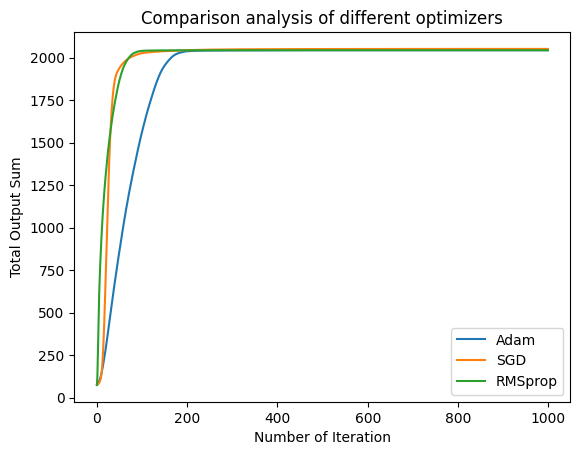

Time taken for Adam: 1.92 seconds
Output Sum Adam: 2044.51
Time taken for SGD: 1.83 seconds
Output Sum SGD: 2052.16
Time taken for RMSprop: 1.43 seconds
Output Sum RMSprop: 2044.50
Input sequence optimizer Adam: tensor([[ 10.0000,  10.0000,  10.0000,  10.0000,  10.0000,  10.0000,  10.0000,
          10.0000,  10.0000,  10.0000,  10.0000, -10.0000,  10.0000,  10.0000,
          10.0000,  10.0000,  10.0000, -10.0000,  10.0000,  10.0000,  10.0000,
          10.0000, -10.0000,  10.0000,  10.0000,  10.0000,  10.0000,  10.0000,
          10.0000,  10.0000,  10.0000,  10.0000, -10.0000,  10.0000,  10.0000,
          10.0000,  10.0000,  10.0000, -10.0000,  10.0000,  10.0000,  10.0000,
          10.0000, -10.0000,  10.0000,  10.0000,  10.0000,  10.0000,  10.0000,
          10.0000,  10.0000,  10.0000,  10.0000,  10.0000,  10.0000,  10.0000,
          10.0000,  10.0000,  10.0000,  10.0000,  10.0000,  10.0000,  10.0000,
          10.0000, -10.0000,  10.0000,  10.0000,  10.0000,  10.0000, -10.0000

In [ ]:
import matplotlib.pyplot as plt

input_tensor1 = torch.rand(1, 299) * 20 - 10 # Input tensor -10 to +10
optimizers = {
    'Adam': optim.Adam,
    'SGD': lambda params, lr: optim.SGD(params, lr=lr, momentum=0.9),
    'RMSprop': optim.RMSprop,
}

output_sums_dict = {key: [] for key in optimizers.keys()} #output sum dictionary to trace back the output sum for each optimizer
times_dict = {key: 0 for key in optimizers.keys()} #time dictionary to store the total time taken for each otimization process
max_outputs = {key: float('-inf') for key in optimizers.keys()}  # maximum output dict for each optimizer
max_input_sequences = {key: None for key in optimizers.keys()}   # input sequnce store for max outout of each tensor
total={}

for i, j in optimizers.items():
    input_tensor2 = input_tensor1.clone().detach().requires_grad_(True) #Cloning existing tensor to new tensor and tracking the gradient descent
    optimizer = j([input_tensor2], lr=0.1)
    start_time = time.time()
    for itr in range(1000):
        optimizer.zero_grad() # setting gradient zero before starting each iteration
        output = model(input_tensor2) #putting input into the shared model
        loss = -output.sum() # (-) to maximize the output sum corresponding to the input
        loss.backward()
        optimizer.step()
        input_tensor2.data = torch.clamp(input_tensor2.data, min=-10, max=10) #step to ensure the input sensor is ranged within the limit -10 to +10.
        output_sum = output.sum().item()
        output_sums_dict[i].append(output.sum().item())
        if output_sum > max_outputs[i]: #checking the output sum of input sensor is greater then the max output
            max_outputs[i] = output_sum
            max_input_sequences[i] = input_tensor2.clone().detach()
    end_time = time.time()
    times_dict[i] = end_time - start_time
    total[i] = output.sum().item()

for i, j in output_sums_dict.items():
    plt.plot(j, label=i)

plt.xlabel('Number of Iteration')
plt.ylabel('Total Output Sum')
plt.title('Comparison analysis of different optimizers')
plt.legend()
plt.show()
for i,j in times_dict.items():
    print(f"Time taken for {i}: {j:.2f} seconds")
    print(f"Output Sum {i}: {total[i]:.2f}")

for i in optimizers.keys():
    print(f"Input sequence optimizer {i}: {max_input_sequences[i]}")


**Input Optimization with Adam optimizer:** Assume the **linear sum** of all inputs can range from -10 to 10. What input sequence maximizes the linear sum of all outputs? What's the output?

Input sequence: tensor([[-3.7465e+00,  7.8122e+00,  1.4536e+00, -6.9405e+00,  9.0831e+00,
          6.6177e+00,  9.4258e+00, -7.4933e+00, -9.2543e+00,  3.7607e+00,
         -4.5268e+00, -5.0990e+00,  4.4082e+00, -1.8884e+00, -8.2867e+00,
         -1.6908e+00,  2.0244e+00, -6.6626e+00,  1.0263e+01,  8.4625e+00,
         -1.1324e+00,  8.9119e+00,  7.6520e+00, -8.4811e+00,  9.0938e-01,
          7.7801e-02, -4.0531e-01,  3.4910e+00, -6.7426e+00,  8.3049e+00,
          5.2572e+00,  6.4572e+00, -9.4388e+00,  1.4307e+00, -1.6691e+00,
          1.7602e-01, -1.6857e+00, -6.4220e+00, -1.1075e+00, -4.5783e+00,
         -3.2543e+00, -1.2418e-01,  1.8898e+00,  6.6589e+00, -4.5732e+00,
          9.2637e+00,  7.1681e-01,  1.1655e+00, -2.2296e+00,  5.0030e-01,
          1.0680e-02, -9.1885e+00,  3.7494e+00,  5.8637e+00,  1.0093e+01,
         -3.7866e+00, -7.8606e+00, -3.7172e+00,  8.7171e+00, -9.1520e+00,
         -4.2091e+00, -7.5730e+00,  1.0303e+01, -3.2750e+00, -4.9836e+00,
          2.4192e+00, 

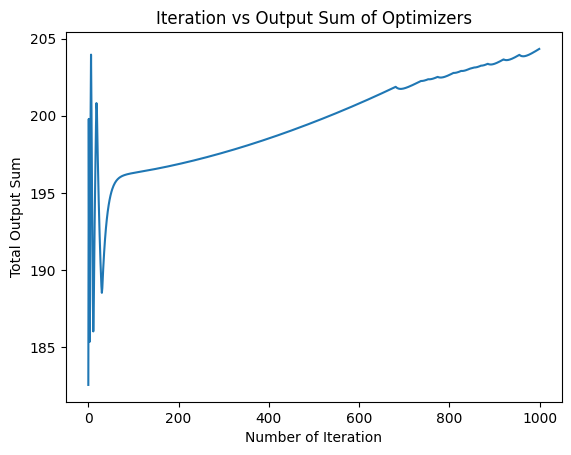

In [ ]:
input_tensor = torch.rand(1, 299) * 20 - 10  # Input tensor -10 to +10
linear_sum = input_tensor.sum() #Calculating the linear sum

#Making sure the input linear sum is within the -10 to +10 range
if linear_sum > 10:
    overflow = linear_sum - 10
    input_tensor -= overflow / input_tensor.numel()
elif linear_sum < -10:
    deficit = -10 - linear_sum
    input_tensor += deficit / input_tensor.numel()
input_tensor.requires_grad = True

optimizer = optim.Adam([input_tensor], lr=0.1)
start_time = time.time()
output_sums = []

for itr in range(1000):
    optimizer.zero_grad()
    output = model(input_tensor)
    loss = -output.sum()
    # Ensuring the linear sum input of max output is bound within the -10 to +10 linear sum input.
    linear_sum = input_tensor.sum()
    if linear_sum > 10:
        loss += (linear_sum - 10)**2*1000
    elif linear_sum < -10:
        loss += (linear_sum + 10)**2*1000
    loss.backward()
    optimizer.step()
    output_sums.append(output.sum().item())
end_time = time.time()

input = input_tensor.detach()
output = model(input)

print("Input sequence:", input)
print("Input sequence linear sum:", input.sum().item())
print("Outpu sum of optimizer:", output.sum().item())
print("Time taken for optimization: {:.2f} seconds".format(end_time - start_time))

plt.plot(output_sums)
plt.xlabel('Number of Iteration')
plt.ylabel('Total Output Sum')
plt.title('Iteration vs Output Sum of Optimizers')
plt.show()